<ipython-input-7-7c006d16ae73>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Debt_to_Income'].replace([float('inf'), -float('inf')], 0, inplace=True)



Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      5072
           1       0.71      0.15      0.25      1445

    accuracy                           0.80      6517
   macro avg       0.76      0.57      0.57      6517
weighted avg       0.78      0.80      0.74      6517

AUC-ROC Score: 0.7523389147828365

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.94      0.72      0.82      1445

    accuracy                           0.93      6517
   macro avg       0.93      0.86      0.89      6517
weighted avg       0.93      0.93      0.93      6517

AUC-ROC Score: 0.9370521923744446

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5072
           1       0.95      0.74      0.83      1445



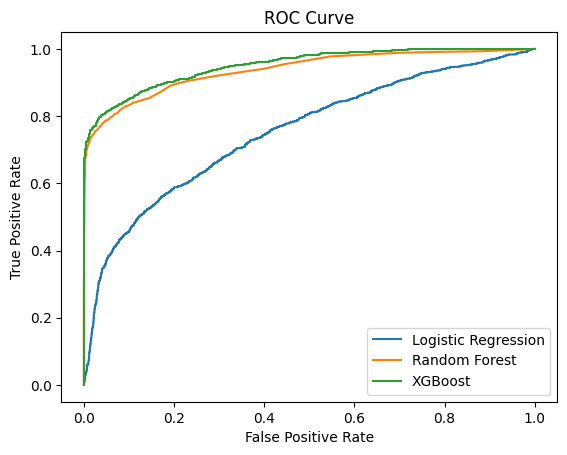

In [ ]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

data = pd.read_csv('./credit_risk_dataset.csv')
data.fillna(data.median(numeric_only=True), inplace=True)
categorical_columns = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Feature engineering
data['Debt_to_Income'] = data['person_income'] / (data['loan_amnt'])
data['Debt_to_Income'].replace([float('inf'), -float('inf')], 0, inplace=True)

X = data.drop('loan_status', axis=1)
y = data['loan_status']

assert X.select_dtypes(include=['object']).empty, "Non-numeric data still present in X!"

#Split data into test and train data (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC Score: {roc_auc_score(y_test, y_pred_prob)}")

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=name)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()